# Week 6: Spectral Graph Theory

Today we will work with graphs. Therefore, we need a python library for representing graphs. 
In particular, we will need `networkx`.
Please run the following commands in your anaconda environment:

```bash
> pip install networkx
```

Afterwards, you should be able to restart your kernel and successfully run the following imports.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import networkx as nx

%matplotlib inline

## Exercise 1: Graphs and Their Spectrums

In this exercise, we will look at the spectrum of a complete graph, a cycle graph (2-regular), and a random 3-regular graph, respectively.
Read and run the code below and consider the eigenvalues plotted.

1. Describe the differences in the eigenvalues for the three graphs
2. Run the code a couple of times and observe what happens to the largest eigenvalue of the random 3-regular graph.

Sum of lambdas
  G1  |  G2   |  G3  
8.000 | 8.000 | 8.000 



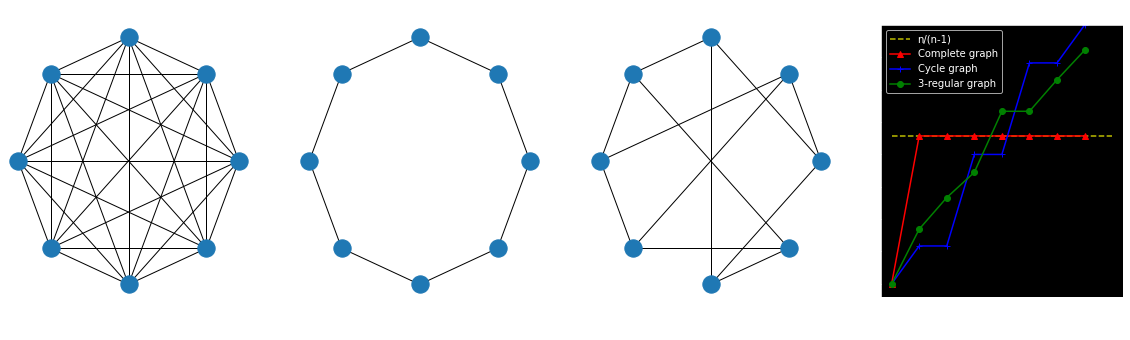

In [3]:
def graph_eig(G): 
    """
        Takes a graph and returns the eigenvalues and eigenvectors of its normalized Laplacian matrix (L = D^{-1/2}(D-A)D^{-1/2})
    """
    A  = nx.to_numpy_array(G)
    D  = A.sum(axis=1)
    D_ = 1. / np.sqrt(D)
    D_ = np.diag(D_)
    L  = D_ @ (np.diag(D)-A) @ D_
    
    lambdas, eigenvectors = np.linalg.eig(L)
    
    order = np.argsort(lambdas)
    lambdas = lambdas[order]
    eigenvectors = eigenvectors[:, order]
    
    return lambdas, eigenvectors

G1 = nx.complete_graph(8)             # Complete graph
G2 = nx.cycle_graph(8)                # Cycle graph
G3 = nx.random_regular_graph(3, 8)    # Random 3-regular graph

l1, e1 = graph_eig(G1)
l2, e2 = graph_eig(G2)
l3, e3 = graph_eig(G3)

fig, ax = plt.subplots(1,4, figsize=(20, 5))

ax[0].set_title("Complete Graph", fontsize=16)
nx.draw_circular(G1, ax=ax[0])
ax[1].set_title("Cycle Graph", fontsize=16)
nx.draw_shell(G2, ax=ax[1])
ax[2].set_title("3-regular Graph", fontsize=16)
nx.draw_shell(G3, ax=ax[2])

ax[3].set_title("Eigenvalues", fontsize=16)
ax[3].set_xlabel('$i$', fontsize=14)
ax[3].set_ylabel('Eigenvalues $\lambda_i$', fontsize=14)
ax[3].plot([0, 8], [8/7., 8/7.], 'y--', label="n/(n-1)")
ax[3].plot(l1,'r^-', label='Complete graph')
ax[3].plot(l2,'b+-', label='Cycle graph')
ax[3].plot(l3,'go-', label='3-regular graph')
ax[3].set_ylim([-0.1,2.0])
ax[3].legend()

print("Sum of lambdas")
print("  G1  |  G2   |  G3  ")
print("%.3f | %.3f | %.3f " % (l1.sum(), l2.sum(), l3.sum()))
print()

## Exercise 2: Spectral Properties of the Graph Laplacian
If we take a closer look at the spectrum above, we observe the following proverties:

1. $\lambda_0 = 0$ for all graphs
1. For all the graphs $\sum_{i=0}^{n-1} \lambda_i = n$
1. For all the graphs, $\lambda_1 \leq \frac{n}{n-1}$
1. For all the graphs, $\lambda_{n-1} \geq \frac{n}{n-1}$
1. For the complete graph, $\lambda_1, \dots, \lambda_{n-1} = \frac{n}{n-1}$

In the following, let $A$ be the adjacency matrix and $[D]_{i,i} = \sum_{j}A_{i, j}$ is the degree matrix.
We refer to eigenvalues $\lambda_i$s of the normalized laplacian $\mathcal{L} = D^{-1/2}LD^{-1/2} = I - D^{-1/2}AD^{-1/2}$.

We will now prove the five observations:

**2.1) $\lambda_0$ is always $0$**  
Prove that the smallest eigenvalue $\lambda_0 = 0$ for any graph.

*Proof:* 
Since $\lambda_0$ is a trivial eigenvalue for the eigenvector $[1,\dots,1]$, and since $\lambda_0$ is the smallest eigenvalue, and eigenvalues cannot be negative, $\lambda_0 = 0$.

**2.2) Sum of the spectrum**  
Prove that if a graph $G$ with $n$ nodes is connected, i.e., there are no isolated nodes, then 
$$
\sum_{i=0}^{n-1} \lambda_i = n
$$

_Hint:_ Recall [the relationship](https://en.wikipedia.org/wiki/Trace_%28linear_algebra%29#Eigenvalue_relationships) between eigenvalues and the trace. 

*Proof:*
$$ n = \sum_{i=0}^{n-1} 1 = \mathrm{tr}(\mathcal{L})  = \sum_{i=0}^{n-1} \lambda_i $$
since $\mathcal{L}$ is a square matrix and that it is diagonal is normalized (i.e. 1).
Since they are all connected the diagonal is all ones, since if a node wasn't connected it would be zero in the entries.

**2.3) Upper bound on $\lambda_1$**  
Prove that if a graph $G$ is connected, then 
$$
\lambda_1 \leq \frac{n}{n-1}
$$

*Proof:*
Since we have $0 = \lambda_0 \leq \lambda_1 \leq \lambda_2 \dots$
$$ \sum_{i=1}^{n-1} \lambda_i = n - \lambda_1$$ 
$$ \lambda_1 \leq \lambda_2 = \dots =\lambda_{n-1}$$
$$ \lambda_1 =\lambda_2 = \dots =\lambda_{n-1} $$
since then
$$ \sum_{i=0}^{n-1} \lambda_i = \sum_{i=0}^{n-1} \lambda_1 = \lambda_1(n-1) = n $$
then $\lambda_1 \leq \frac{n}{n-1}$

**2.4) Lower bound on $\lambda_{n-1}$**  
Prove that if a graph $G$ is connected, then 
$$
\lambda_{n-1} \geq \frac{n}{n-1}
$$

*Prove:*
$$ \lambda_1 =  \dots =\lambda_{n-1} $$
$$ \sum_{i=0}^{n-1} \lambda_i = \sum_{i=0}^{n-1} \lambda_{n-1} = \lambda_1(n-1) = n $$
$$ \lambda_{n-1} \geq \frac{n}{n-1} $$


**2.5) Tight bound for complete graphs**  
To prove that for all complete graphs, $\lambda_0 = 0$ and $\lambda_i = \frac{n}{n-1}$ for $i=1, \dots, n-1$.


## Exercise 3: Karate World

In this exercise, we will look at Zachary's Karate club.
Run the code below to visualize it.

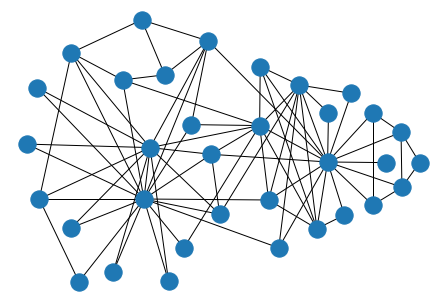

In [4]:
karate = nx.Graph()
karate.add_edges_from([(1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9), (1,11), (1,12), (1,13), (1,14), (1,18), (1,20), (1,22), (1,32), (2,3), (2,4), (2,8), (2,14), (2,18), (2,20), (2,22), (2,31), (3,4), (3,8), (3,9), (3,10), (3,14), (3,28), (3,29), (3,33), (4,8), (4,13), (4,14), (5,7), (5,11), (6,11), (6,17), (6,7), (7,17), (9,31), (9,33), (9,34), (10,34), (14,34), (15,33), (15,34), (16,33), (16,34), (19,33), (19,34), (20,34), (21,33), (21,34), (23,33), (23,34), (24,26), (24,28), (24,30), (24,33), (24,34), (25,26), (25,28), (25,32), (26,32), (27,30), (27,34), (28,34), (29,32), (29,34), (30,33), (30,34), (31,33), (31,34), (32,33), (32,34), (33,34)])
fixed_positions = {1:(10.74,4.07),2:(9.76,6.48),3:(8.39,5.21),4:(10.37,1.98),5:(12.30,5.61),6:(13.31,3.28),7:(13.28,5.00),8:(8.41,7.06),9:(6.72,4.31),10:(5.77,1.38),11:(12.30,2.72),12:(12.75,4.05),13:(11.32,2.41),14:(8.70,2.88),15:(3.33,0.63),16:(1.88,2.01),17:(13.92,4.05),18:(10.77,5.61),19:(0.69,6.40),20:(9.05,1.38),21:(0.34,4.63),22:(11.56,6.22),23:(5.24,0.34),24:(1.88,7.49),25:(5.11,6.80),26:(4.31,8.52),27:(2.14,0.32),28:(3.65,6.64),29:(6.03,5.24),30:(0.77,2.91),31:(7.01,2.43),32:(6.61,7.86),33:(4.60,4.52),34:(4.39,2.91)}
nx.draw(karate,pos=fixed_positions)
plt.show()

Text(0.5, 1.0, 'Karate spectrum')

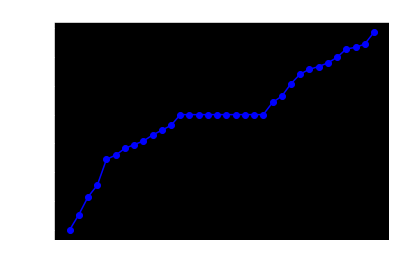

In [5]:
lk, ek = graph_eig(karate)
fig, ax = plt.subplots(1,1)
ax.plot(lk, 'b-o')
ax.set_xlabel("$i$")
ax.set_ylabel("$\lambda_i$")
ax.set_title("Karate spectrum")

The plot of the spectrum looks as expected. Let's 
look at the properties of the eigenvectors of the graph.

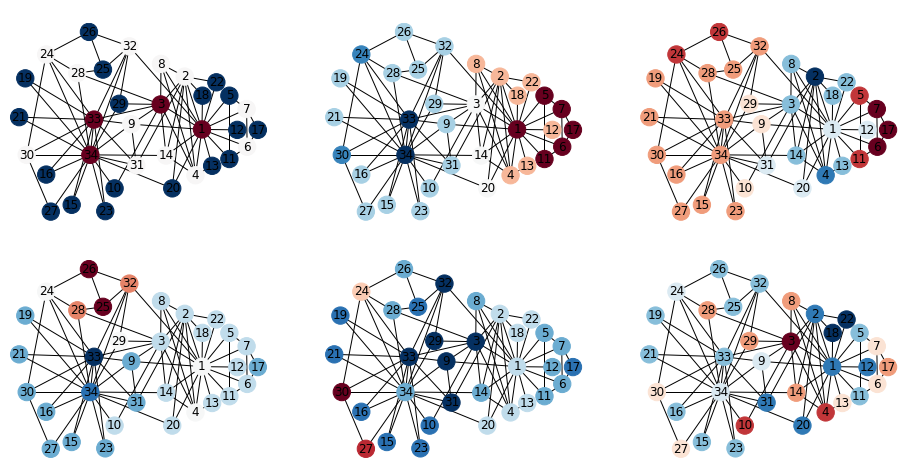

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
ek_ = np.around(ek, decimals=1)
for k in np.arange(0,6): 
    i, j = k // 3, k % 3
    ncs = ek_[:,k]
    nx.draw(karate, ax=ax[i, j], cmap=plt.get_cmap('RdBu'), node_color=ncs, pos=fixed_positions, with_labels=True)
    ax[i, j].set_title("k = %i" % k)

**Exercise 3.1**  
 - What happens to the node coloring as $k$ increases? 
 - Do you observe anything surprising?
 - How does what we see here relate to Spectral Clustering?

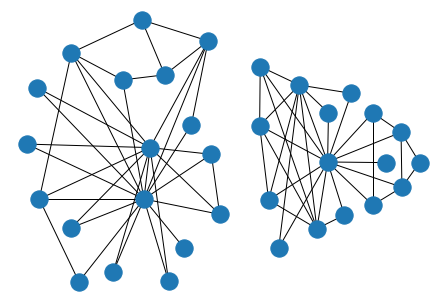

In [7]:
karate2 = nx.Graph()
karate2.add_edges_from([(1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,11), (1,12), (1,13), (1,14), (1,18), (1,20), (1,22), (2,3), (2,4), (2,8), (2,14), (2,18), (2,20), (2,22), (3,4), (3,8), (3,14), (4,8), (4,13), (4,14), (5,7), (5,11), (6,11), (6,17), (6,7), (7,17), (9,31), (9,33), (9,34), (10,34), (15,33), (15,34), (16,33), (16,34), (19,33), (19,34), (21,33), (21,34), (23,33), (23,34), (24,26), (24,28), (24,30), (24,33), (24,34), (25,26), (25,28), (25,32), (26,32), (27,30), (27,34), (28,34), (29,32), (29,34), (30,33), (30,34), (31,33), (31,34), (32,33), (32,34), (33,34)])
fixed_positions = {1:(10.74,4.07),2:(9.76,6.48),3:(8.39,5.21),4:(10.37,1.98),5:(12.30,5.61),6:(13.31,3.28),7:(13.28,5.00),8:(8.41,7.06),9:(6.72,4.31),10:(5.77,1.38),11:(12.30,2.72),12:(12.75,4.05),13:(11.32,2.41),14:(8.70,2.88),15:(3.33,0.63),16:(1.88,2.01),17:(13.92,4.05),18:(10.77,5.61),19:(0.69,6.40),20:(9.05,1.38),21:(0.34,4.63),22:(11.56,6.22),23:(5.24,0.34),24:(1.88,7.49),25:(5.11,6.80),26:(4.31,8.52),27:(2.14,0.32),28:(3.65,6.64),29:(6.03,5.24),30:(0.77,2.91),31:(7.01,2.43),32:(6.61,7.86),33:(4.60,4.52),34:(4.39,2.91)}
nx.draw(karate2,pos=fixed_positions)
plt.show()

**Exercise 3.2:**  
In the above graph, we have cut some edges to form two connected components.
What will happen to the spectrum of this simpler graph?

If you want, you can try to plot the spectrum and see if you were right.

In [ ]:
# TODO Plot spectrum.
# lambdas, eig_vectors = graph_eig(karate2)

lk, ek = graph_eig(karate2)
fig, ax = plt.subplots(1,1)
ax.plot(lk, 'b-o')
ax.set_xlabel("$i$")
ax.set_ylabel("$\lambda_i$")
ax.set_title("Karate spectrum")


## Exercise 4: Other spectrums

Please find the spectrums of different symmetric matrices, computed from the karate graph, below. 
Write code to plot them and explain how the spectrums differ.

In particular, what can you say about the sum of the spectrums and the bounds on the eigenvalues?

In [ ]:
# Returns eigenvalues of the adjacency matrix of G.
lA = nx.adjacency_spectrum(karate)
lA = np.sort(lA)

# Returns eigenvalues of the Laplacian of G
lL = nx.laplacian_spectrum(karate)
lL = np.sort(lL)

# Return eigenvalues of the normalized Laplacian of G
lN = nx.normalized_laplacian_spectrum(karate)
lN = np.sort(lN)

# Returns eigenvalues of the modularity matrix of G.
lM = nx.modularity_spectrum(karate)
lM = np.sort(lM)

# TODO plot the spectrums

## Exercise 5: Modularity

Please answer the following questions:
1. Can modularity be negative? If so, try to come up with an example.
2. What is the modularity of two complete connected components, each with $\frac{n}{2}$ nodes?

_Hint:_ Think about the relation between the number of expected edges and the actual number of edges.
If there are $N$ nodes in the graph, then
$$
\sum_{i=1}^N k_i = 2m.
$$


## Exercise 6: Spectral Clustering
In this exercise, we are going to implement the spectral clustering algorithm. 
Recal, that the algorithm has three steps:

1. Construct nearest-neighbor-graph of the data.
2. Do the eigen-decomposition of the graph Laplacian
3. Use K-means to cluster the features of the eigenvectors corresponding to the smallest non-zero eigenvalues

Below, we will make code that allows us to test performance of different Laplacians.
But first we need some data to cluster.

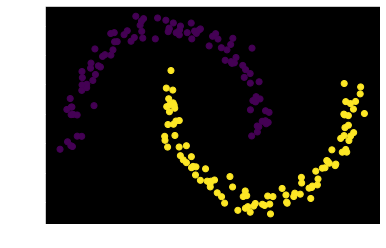

In [8]:
import sklearn.datasets
X, y = sklearn.datasets.make_moons(n_samples=200, shuffle=True, noise=.06)
fig, ax = plt.subplots(1, 1)
ax.scatter(*(X.T), c=y)
plt.show()

Note how K-Means it self does not work on this data-set, as opposed to Spectral Clustering.

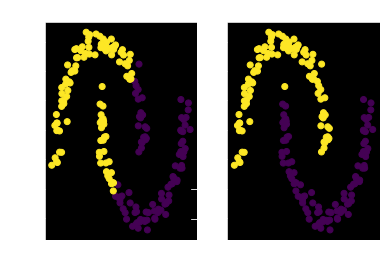

In [9]:
from sklearn.cluster import SpectralClustering, KMeans

clustering = SpectralClustering(n_clusters=2, n_neighbors=20, affinity='nearest_neighbors').fit(X)
kmeans = KMeans(2).fit(X)

fig, ax = plt.subplots(1, 2)
ax[0].set_title("K-Means")
ax[0].scatter(*(X.T), c=kmeans.labels_)
ax[1].set_title("Spectral Clustring")
ax[1].scatter(*(X.T), c=clustering.labels_)


Let's try to implement Spectral Clustering.
You may use the [NearestNeighbors](https://scikit-learn.org/stable/modules/neighbors.html) algorithm from sklearn to speed up things a bit.

You can try with different Laplacians if you want.

Hints to make it work:
 - Use weighted adjacency matrix (mode='distance' for `kneighbors_graph`)
 - n_neighbors=2 and 3 eigenvectors worked well for us.

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Comstruct nearest neighbor graph.
nbrs = NearestNeighbors(n_neighbors=20).fit(X)
moons = nx.from_scipy_sparse_matrix(nbrs.kneighbors_graph(X, mode='distance'))

# Plot the graph that we just computed.
nx.draw(moons, pos=X, node_size=30, node_color=y)

In [ ]:
from sklearn.cluster import k_means

# TODO: Do spectral clustering. 
y_clust = np.zeros(X.shape[0])

# END TODO

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].plot(l)
ax[0].set_title("Spectrum of graph")
ax[1].scatter(*(X.T), c=y)
ax[1].set_title("Labels")
ax[2].scatter(*(X.T), c=y_clust)
ax[2].set_title("Spectral clusters")
